# **<center>Machine Learning and Finance </center>**


## <center> Programming Session 1 - Introduction to Supervised  and Unsupervised Learning </center>

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://mlfbg.github.io/MachineLearningInFinance/">
    <img src="https://drive.google.com/uc?export=view&id=1gmxxmwCR1WXK0IYtNqvE4QXFleznWqQO" height="50"/>
    Course page</a>
</td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1o72fpIsPRspFlWqHkgkZAgkSZdziLqPM?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />Run in Google Colab</a>
  </td>
</table>


The Objective of this session is to create a Machine Learning Model to predict the labels of the MNIST dataset

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1zXEa84lsRYYcIrJZgab-iE7QNPtngztB"></center>

Outline 

- [How to use Pipelines](#How-to-use-Pipelines)
  - [Importing basic libraries](#Importing-basic-libraries)
  - [Loading the MNIST dataset](#Loading-the-MNIST-dataset)
  - [Unsupervised Learning (PCA) ](#Unsupervised-Learning-(PCA))
  - [Combining transformers and classifiers in a pipeline](#Combining-transformers-and-classifiers-in-a-pipeline)
- [Fine tuning the models via grid search](#Fine-tuning-the-models-via-grid-search)
  - [Model Performance using K flod cross validation](#Model-Pergormance-using-K-flod-cross-validation)
  - [Optimizing Hyperparameters using grid search](#Optimizing-Hyperparameters-using-grid-search)
- [Evaluation Metrics](#Evaluation-Metrics)
  - [The Test Accuracy](#The-Test-Accuracy)
  - [The confusion matrix](#The-confusion-matrix)
- [Summary](#Summary)

# How to use Pipelines

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=13BiobMkNXmkJXth6meOOXmnjENKTKiOm"></center>

## Import basic libraries

In [ ]:
import pandas as pd # for manipulating dataframes
import matplotlib.pyplot as plt # for plotting 
import numpy as np # for manipulating arrays
import sklearn # for creating Machine Learning Models 
import tensorflow as tf # for creating Neural Networks, we will use it to load data

## Loading the MNIST dataset
Each MNIST image is a 2 dimensional vector of shape (28, 28), which we can flatten into a vector of 784 integers between 0-255 representing the intensity of a pixel. 

Q1. Load the data using `tf.keras.datasets.mnist.load_data()`

11493376/11490434 [==============================] - 0s 0us/step


Q2. What is the Shape of the training data ?

(60000, 28, 28)

Q3. Plot the first training data

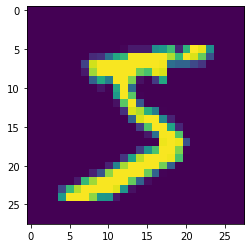

Q4. Reshape all the images into 784 dimensional vectors 

Q5. What's the new shape of the training data ? 

(60000, 784)

Q6. What's the new shape of the test data ? 

(10000, 784)

Q7. Rescale training and test data by dividing by 255

## Unsupervised Learning 

In this section, we want to reduce the dimensionality from 784 to 2 dimensions in order to visualise it in a scatter plot

Q8. Import `PCA` from `sklearn.decomposition`. Fit the PCA model to the training data and transform both training and test data

In [ ]:
# Import the Unsupervised Model called PCA

# The model is called pca

# Fit the pca model on the train data and transform it 

# Now that the model has been trained, transform the test data


Q9. What's the new shape of the reduced training and test data ? 

(60000, 2)

(10000, 2)

Q10. Visualise it in a scatter plot

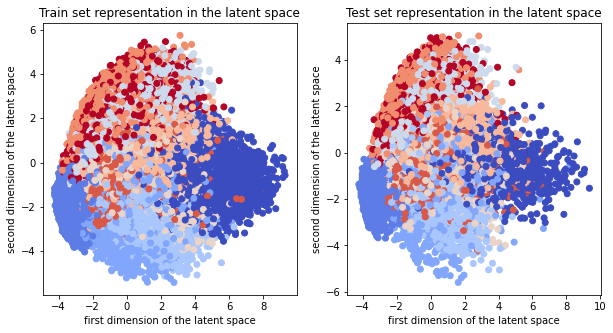

In [ ]:
from matplotlib.cm import coolwarm

fig = plt.figure(figsize=(10, 5))
for fid_idx, (x, y, title) in enumerate(
            zip([X_train_reduced, X_test_reduced], [y_train, y_test], ['Train', 'Test'])):
    ax = fig.add_subplot(1, 2, fid_idx + 1)
    ax.scatter(x[:, 0], x[:, 1], c = y, cmap=coolwarm)
    ax.set_xlabel("first dimension of the latent space")
    ax.set_ylabel("second dimension of the latent space")
    ax.set_title("{} set representation in the latent space".format(title))
plt.show()

## Combining transformers and classifiers in a pipeline

In this section, we want to use `Pipeline` to combine unsupervised and supervised models. 

Q11. First, import the unsupervised model (`PCA` from `sklearn.decompostion`) and the supervised model (`RandomForestClassifier` from `sklearn.ensemble`
Then import `Pipeline` from `sklearn.pipeline` and define your pipeline. 
Fit the data to the global model and evaluate it on the test set. 

In [ ]:
# Import Modules

# Create the model by combining pca (Transform data) -> RandomForest(Predict output)

# Fit the model 

# Evaluate the Model on train and test data

# Predict the targets of the test data


Train Accuracy: 0.973
Test Accuracy: 0.412


# Fine-tuning the models via grid search

## Model Performance using K-fold cross validation

Q12. In this section, we want to use cross validation to assess the model performance. For that you can use `cross_val_scole` from `sklearn.model_selection` 

<center><img width="500" src = "https://drive.google.com/uc?export=view&id=1mIwYNKnb7noWEl-aPU0Zug-_J16XI34d"></center>

In [ ]:
# Import cross validation method

# Apply the cross validation to train data and get the performances


# Print Cross Validation Accuracy Score on the test set 



CV accuracy scores: [0.403      0.41533333 0.39516667 0.41266667 0.4125     0.40483333
 0.39783333 0.402      0.4125     0.42366667]
CV accuracy: 0.408 +/- 0.008


## Optimizing Hyperparameters using grid search

Q13. In this section, we want to optimize the hyperparameters. 

Let us focus on the the Random Forest model and the PCA. We want to optimize the following hyperparameters: 

* The reduced dimensionality of the data after the PCA transformation. 
* The number of trees used in the Random Forest algorithm. 

Create a list of possible values for each hyperparameter and find the best combination using `GridSearchCV`from `sklearn.model_selection`

<center><img width="1000" src = "https://drive.google.com/uc?export=view&id=1kOTyMHxAPyCkL-dLSEJnyCA5efQhi1N4"></center>

In [ ]:
# Import Modules 

# Create a default model

# Create a list of choices for each hyperparameter

# Create the grid of possible combinations 

# Prepare the Grid Search Fine Tuning 

# Test all the possible hyperparamters

# The best hyperparameters


0.9513166666666667
{'clf__n_estimators': 100, 'pca__n_components': 50}


# Evaluation Metrics

## The Test Accuracy

Q14. Define your final model by taking the best hyperparameters

In [ ]:
# The final model is the one with the best hyperparameters


Test accuracy: 0.956


## The confusion matrix

Q15. Plot the confusion matrix using `confusion_matrix` from `sklearn.metrics`

In [ ]:
# Import module 

# Predict the test data using the best model

# Create the confusion matrix 


[[ 965    0    2    1    0    3    6    1    2    0]
 [   0 1121    4    3    0    1    3    0    3    0]
 [   8    0  978   10    4    2    2    8   20    0]
 [   1    0    4  958    1   15    1    8   15    7]
 [   0    0    4    0  943    2    6    2    4   21]
 [   3    1    3   19    6  845    9    1    3    2]
 [   9    3    2    1    2    5  936    0    0    0]
 [   0    5   18    2    6    1    1  973    2   20]
 [   8    0    8   15   10   18    4    5  895   11]
 [   6    4    3   12   17    3    1   12   10  941]]


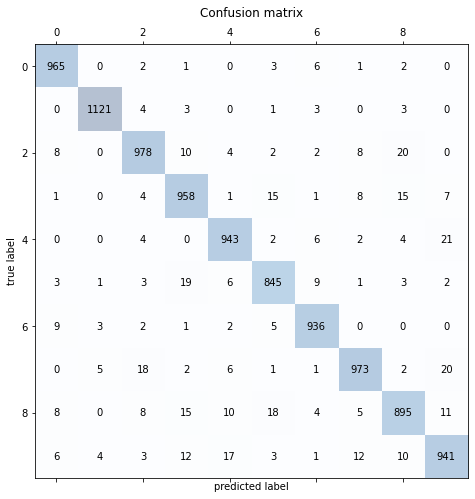

In [ ]:
# Plot the confusion matrix in a fancy way 
fig, ax = plt.subplots(figsize=(7, 7))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion matrix')
plt.tight_layout()
plt.show()

# Summary

In this programming session, we've learned the best practices of building good maching learning models, which can be summerized as follows: 


*   Preprocessing the data
*   Creating Pipelines combining unsupervised and supervised algorithms 
* Fine-Tuning the machine learning models.
* Evaluating the final model using different performance metrics. 





# Exercises: 

* Create new pipelines on another dataset like [fashion MNIST](https://www.tensorflow.org/datasets/catalog/fashion_mnist) dataset from `tensorflow.keras.datasets`. 

This dataset includes 60 000 images for training and 10 000 images for validation. There are 10 different integers labels ranging from 0-9. Each integer represets a specific article of clothing (T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot)

* Optimize the hyperparameters using GridSearch algorithm
* Use cross validation to assess the performance of your _best_ model
* Plot the confusion matrix to assess the performance per class. 